# Homework 1 - PPIA
Scalco Riccardo (2155352)

Ferrari Luca (2166294)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2025-10-26 12:47:31.783040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761482852.016830      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761482852.089766      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Dataset choice

We choose the follwing dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set/ . The first thing that we do it is to print the first row of the dataset, to see the attributes.

In [2]:
diabetes_df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_df.describe().round()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


## Macrodata Protection

### Cell Suppression

In [4]:
age_pregnancies_df = diabetes_df[['Age', 'Pregnancies']].groupby('Age').value_counts()\
                         .reset_index()\
                         .pivot_table(index='Age', columns='Pregnancies', values='count')

age_pregnancies_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Age,,,,,,,,,,,,,,,,,
21,21.0,23.0,14.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,17.0,22.0,18.0,10.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,8.0,13.0,10.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,9.0,14.0,9.0,7.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,13.0,7.0,14.0,9.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,9.0,7.0,5.0,5.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,5.0,4.0,8.0,6.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2.0,8.0,5.0,6.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,3.0,6.0,5.0,2.0,5.0,2.0,3.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
threshold = 2

privatized_age_pregnancies_df = age_pregnancies_df.copy()
privatized_age_pregnancies_df[age_pregnancies_df<threshold] = "SUPPRESSED"
privatized_age_pregnancies_df

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/tmp/ipykernel_19/2529480178.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'SUPPRESSED' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  privatized_age_pregnancies_df[age_pregnancies_df<threshold] = "SUPPRESSED"


Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Age,,,,,,,,,,,,,,,,,
21,21.0,23.0,14.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,17.0,22.0,18.0,10.0,4.0,NaN,NaN,NaN,SUPPRESSED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,8.0,13.0,10.0,3.0,3.0,NaN,SUPPRESSED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,9.0,14.0,9.0,7.0,4.0,SUPPRESSED,SUPPRESSED,SUPPRESSED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,13.0,7.0,14.0,9.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,9.0,7.0,5.0,5.0,4.0,SUPPRESSED,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,5.0,4.0,8.0,6.0,3.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2.0,8.0,5.0,6.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,3.0,6.0,5.0,2.0,5.0,2.0,3.0,SUPPRESSED,NaN,SUPPRESSED,SUPPRESSED,NaN,NaN,NaN,NaN,NaN,NaN


### n-k

We set this parameter

In [6]:
n = 3
k = 0.3

In [7]:
col = 'Pregnancies'

nk_df = diabetes_df[col].head(5)
print(nk_df)

contribution = nk_df / np.sum(nk_df)
print("Percentual contribution:", contribution.values)

contribution_higher_then_k = 0
for i in contribution:
    if i > k:
        contribution_higher_then_k += 1
print(contribution_higher_then_k)

is_sensitive = False
if contribution_higher_then_k > 0 and contribution_higher_then_k < n:
    is_sensitive = True
print(f"Is the cell sensitive according to ({n}, {int(k*100)}%)? {is_sensitive}")

0    6
1    1
2    8
3    1
4    0
Name: Pregnancies, dtype: int64
Percentual contribution: [0.375  0.0625 0.5    0.0625 0.    ]
2
Is the cell sensitive according to (3, 30%)? True


### p-percent

In [8]:
p = list(range(0, 101, 1))
col = 'Pregnancies'

p_percent_df = diabetes_df[col].head(5)
print(p_percent_df)
v1, v2 = p_percent_df.nlargest(2).values
t = p_percent_df.sum()

for perc in p:
    if (t - v1 - v2) < (perc/100) * v1:
        print(f"Min p = {perc}%")
        break

0    6
1    1
2    8
3    1
4    0
Name: Pregnancies, dtype: int64
Min p = 26%


## Correlation Heatmap

In [9]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    corr_matrix = df.corr()
    
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                fmt='.2f')
    
    plt.title('Correlation Heatmap of All Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


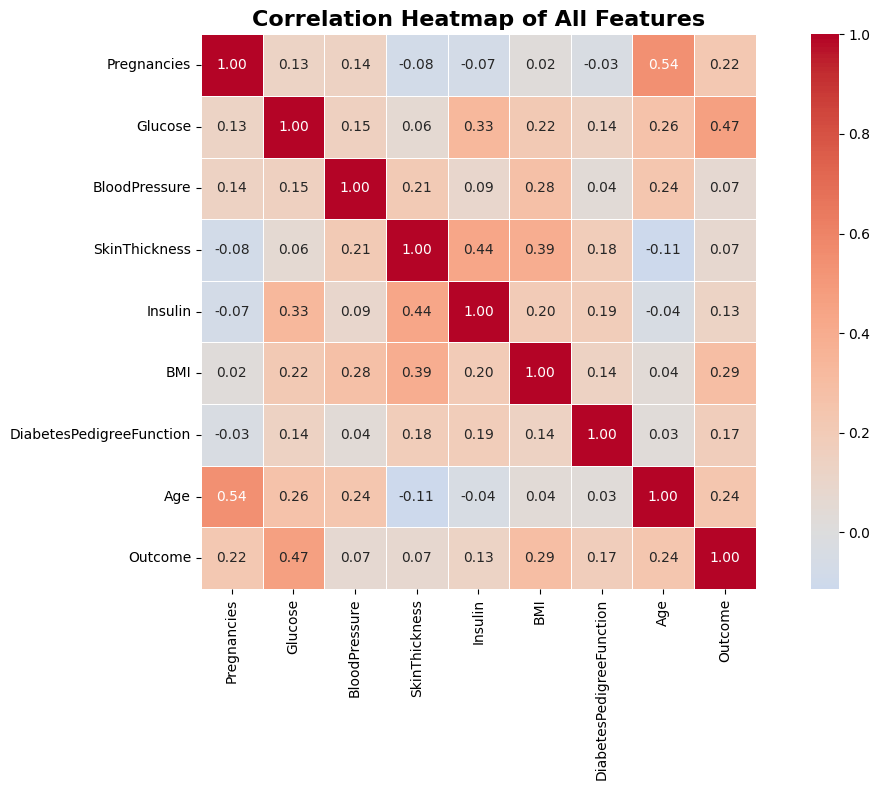

In [10]:
plot_correlation_heatmap(diabetes_df)

## Define the Model

In [11]:
def train_model(X_train, y_train):
    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=10,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42
    )
    rf.fit(X_train, y_train)
    return rf

def test_model(X_test, y_test,rf):
    y_pred_rf = rf.predict(X_test)
    
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
    print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [12]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = train_model(X_train, y_train)
test_model(X_test, y_test, model)

Random Forest Accuracy: 0.7552083333333334
Confusion Matrix:
 [[93 30]
 [17 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       123
           1       0.63      0.75      0.69        69

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.77      0.76      0.76       192



## Microdata Protection

In [13]:
diabetes_micro_df = diabetes_df.copy()

### Synthetic Data Generation

In [14]:
(diabetes_micro_df.iloc[: ,:-1]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [15]:
(diabetes_micro_df.iloc[: ,1:-3]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [16]:
diabetes_micro_df.iloc[:, 1:-3] = diabetes_micro_df.iloc[:, 1:-3].replace(0, np.nan)
diabetes_micro_df

/tmp/ipykernel_19/3090821238.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_micro_df.iloc[:, 1:-3] = diabetes_micro_df.iloc[:, 1:-3].replace(0, np.nan)
/tmp/ipykernel_19/3090821238.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_micro_df.iloc[:, 1:-3] = diabetes_micro_df.iloc[:, 1:

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [17]:
X = diabetes_micro_df.drop("Outcome", axis=1)
y = diabetes_micro_df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_scaled)

X_restored = scaler.inverse_transform(X_imputed)
X = pd.DataFrame(X_restored, columns=X.columns)  

In [18]:
diabetes_micro_generated_df = pd.concat([X, y], axis=1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

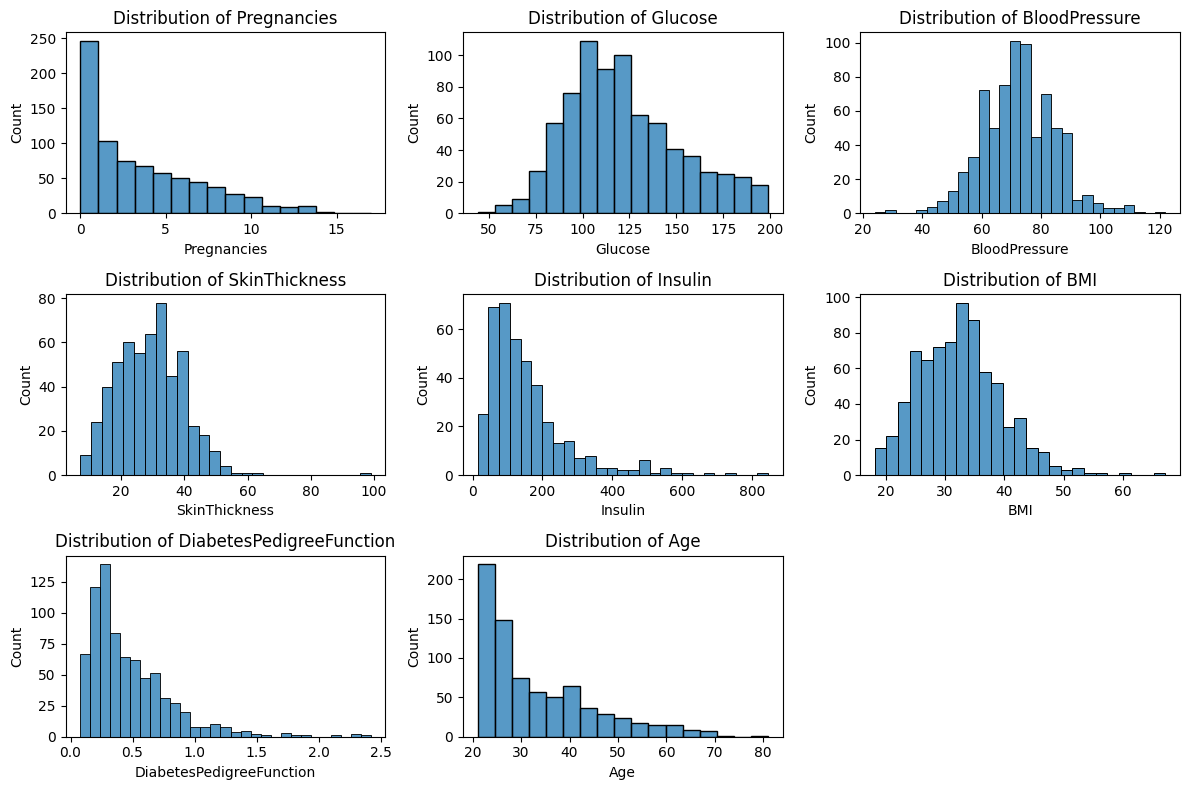

In [19]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(diabetes_micro_generated_df.columns[:-1]):  
    plt.subplot(3, 3, i+1)
    sns.histplot(diabetes_micro_df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [20]:
diabetes_micro_df = diabetes_micro_generated_df.copy()

 ### Generalization

In [21]:
def plotGroup(df, target):
    sns.histplot(data=df, x=target)
    plt.show()

In [22]:
def Generalization(bins ,labels, target, df, group_means):
    plt.hist(diabetes_micro_generated_df[target], bins=15, edgecolor='black')
    plt.title("Distribuition of "+target)
    plt.xlabel(target)
    plt.ylabel('Frequency')
    plt.show()
    
    df[target] = pd.cut(df[target], bins=bins, labels=labels)
    plotGroup(df, target)

    df[target] = df[target].map(group_means)
    
    plotGroup(df, target)

    return df

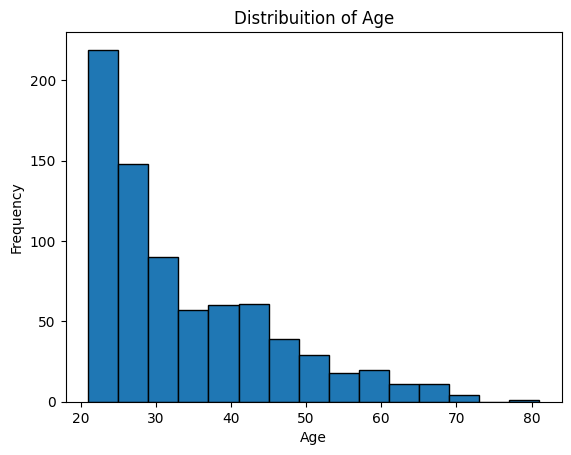

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


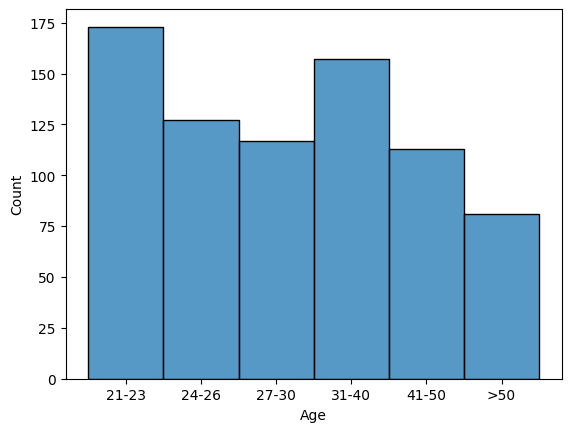

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


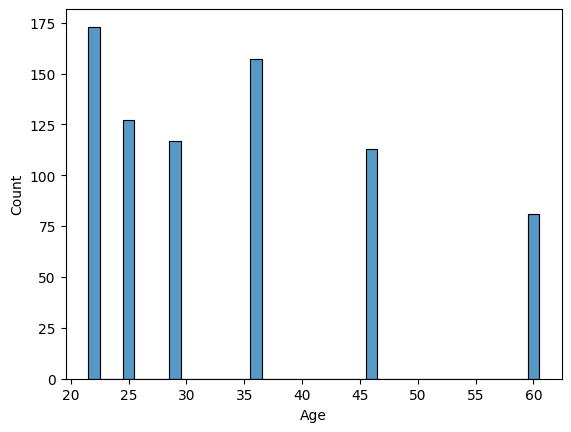

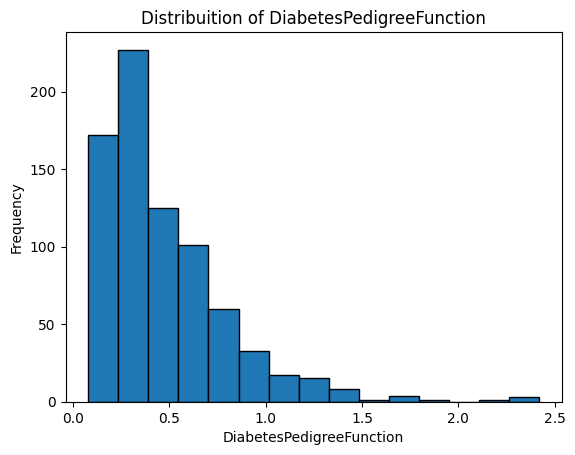

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


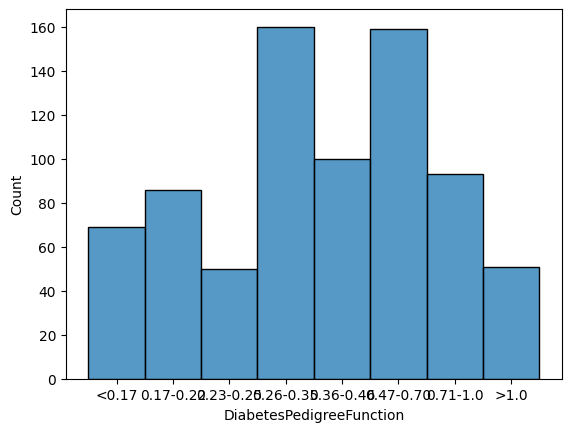

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


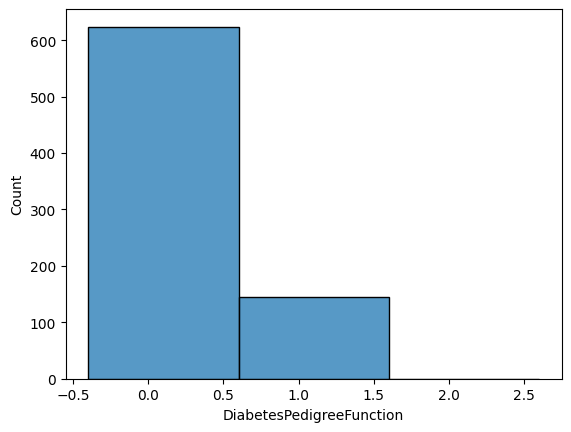

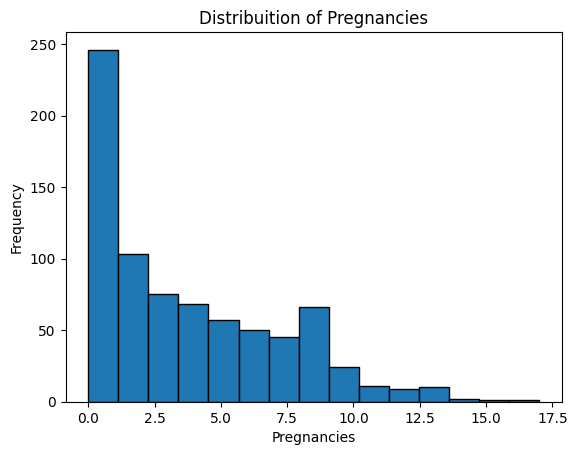

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


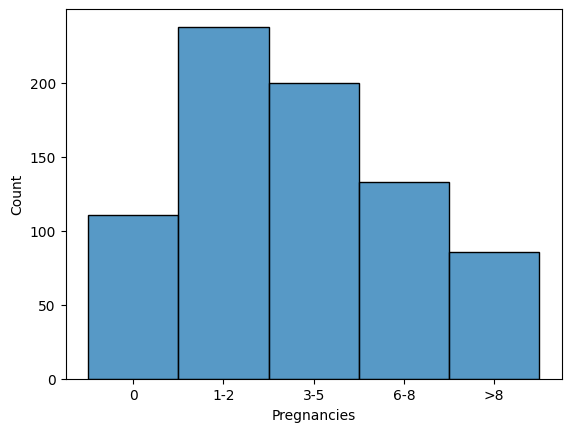

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


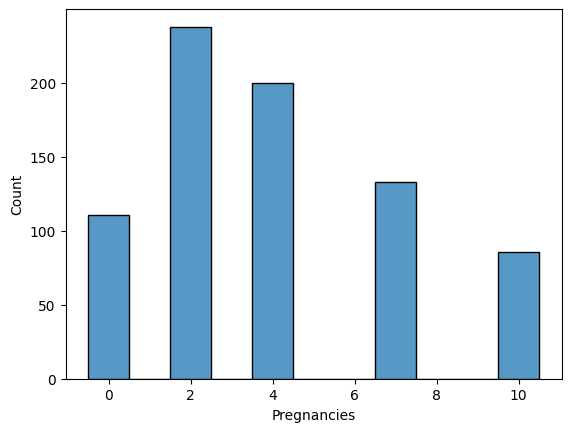

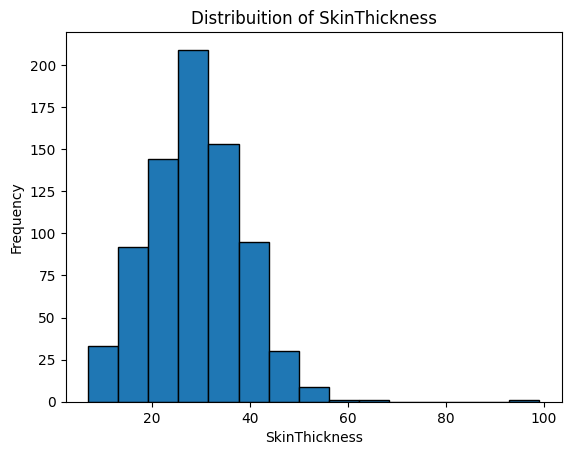

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


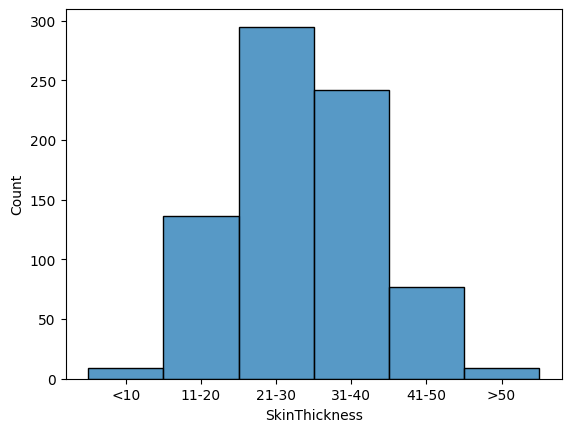

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


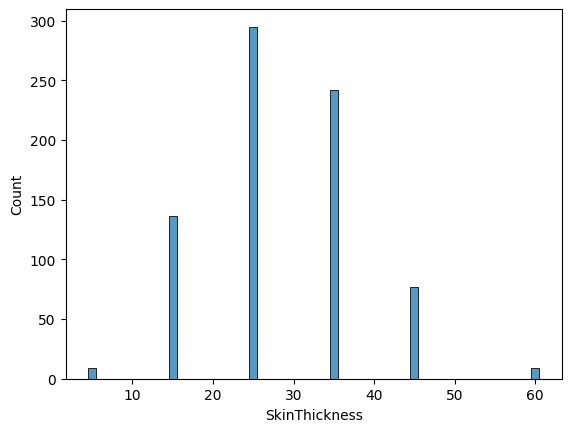

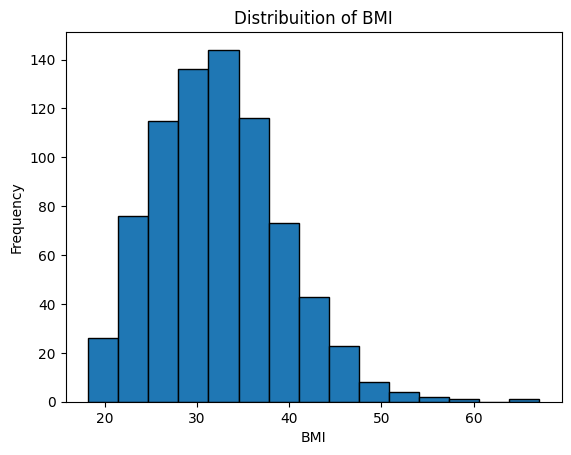

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


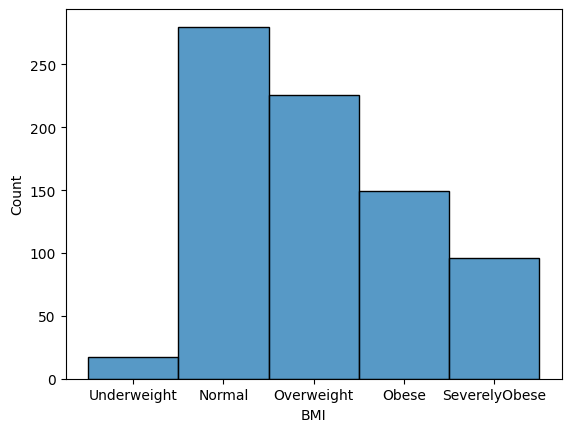

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


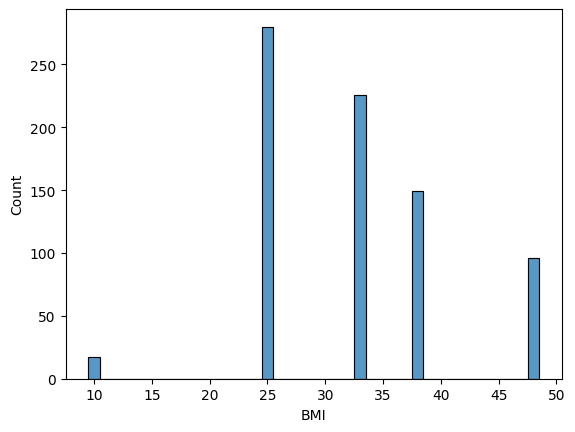

In [23]:
#Age
bins = [0, 20, 23, 26, 30, 40, 50, 100] 
labels = ['<20', '21-23', '24-26', '27-30', '31-40', '41-50', '>50']
age_group_means = {
    '<20': 10, 
    '21-23': 22,
    '24-26': 25,
    '27-30': 28.5,
    '31-40': 35.5,
    '41-50': 45.5,
    '>50': 60           
}
diabetes_micro_df = Generalization(bins, labels, "Age", diabetes_micro_df, age_group_means)

#DBF
bins = [0, 0.16, 0.22, 0.25, 0.35, 0.46, 0.7, 1, 3]
labels = ['<0.17', '0.17-0.22', '0.23-0.25', '0.26-0.35', '0.36-0.46', '0.47-0.70', '0.71-1.0', '>1.0']
dbf_group_means = {
    '<0.17': 0.10, 
    '0.17-0.22': 0.195, 
    '0.23-0.25': 0.24, 
    '0.26-0.35': 0.305, 
    '0.36-0.46': 0.41, 
    '0.47-0.70': 0.585, 
    '0.71-1.0': 0.855, 
    '>1.0': 1.2        
}
diabetes_micro_df = Generalization(bins, labels, "DiabetesPedigreeFunction", diabetes_micro_df, dbf_group_means) 

#Pregnancies
bins = [-1, 0, 2, 5, 8, 20]
labels = ['0', '1-2', '3-5', '6-8', '>8']
pregnancies_group_means = {
    '0': 0, 
    '1-2': 1.5,
    '3-5': 4,
    '6-8': 7,
    '>8': 10         
}
diabetes_micro_df = Generalization(bins, labels, "Pregnancies", diabetes_micro_df, pregnancies_group_means) 

#SkinThickness
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['<10','11-20','21-30','31-40','41-50','>50']
skin_thickness_group_means = {
    '<10': 5,
    '11-20': 15,
    '21-30': 25,
    '31-40': 35,
    '41-50': 45,
    '>50': 60
}
diabetes_micro_df = Generalization(bins, labels, "SkinThickness", diabetes_micro_df, skin_thickness_group_means) 

#BMI
bins = [0, 20.5, 30, 35, 40, 100]
labels = ['Underweight','Normal','Overweight','Obese','SeverelyObese']
bmi_group_means = {
    'Underweight': 10,
    'Normal': 25,
    'Overweight': 32.5,
    'Obese': 38,
    'SeverelyObese': 48
}
diabetes_micro_df = Generalization(bins, labels, "BMI", diabetes_micro_df, bmi_group_means) 

### Top/Bottom Coding

In [24]:
diabetes_micro_df['Glucose'] = diabetes_micro_df['Glucose'].clip(lower=60, upper=190)

diabetes_micro_df['Insulin'] = diabetes_micro_df['Insulin'].clip(upper=300)

### Rounding

In [25]:
diabetes_micro_df['Insulin'] = (diabetes_micro_df['Insulin'] / 10).round() * 10

diabetes_micro_df['BloodPressure'] = (diabetes_micro_df['BloodPressure'] / 5).round() * 5

diabetes_micro_df['Glucose'] = (diabetes_micro_df['Glucose'] / 5).round() * 5

## Model After Privacy Preserving 

Finally we apply the same model as before. We use the data which have been modified by privacy preserving techniques for the train and the original data for test. We can see that the accuarcy decrease. In the end we print also the correlation heatmap.

In [26]:
X = diabetes_micro_df.drop('Outcome', axis=1)
y = diabetes_micro_df['Outcome']

X_train_micro, X_test_micro, y_train_micro, y_test_micro = train_test_split(X, y, test_size=0.25, random_state=42)

model = train_model(X_train_micro, y_train_micro)
test_model(X_test, y_test, model)

Random Forest Accuracy: 0.7083333333333334
Confusion Matrix:
 [[99 24]
 [32 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       123
           1       0.61      0.54      0.57        69

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.70      0.71      0.70       192



/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


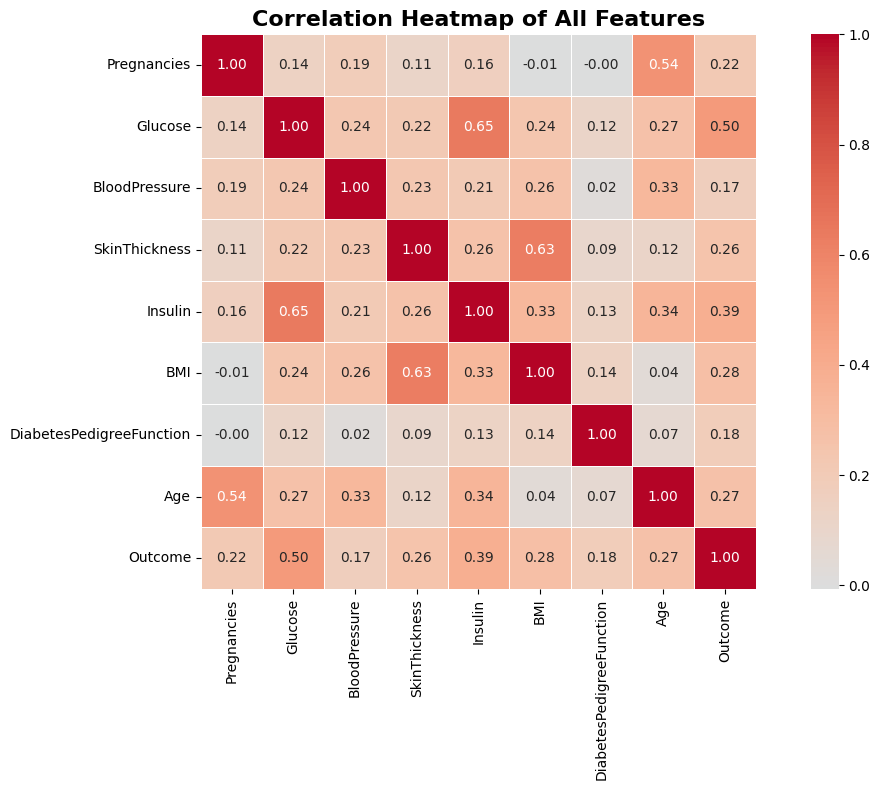

In [27]:
plot_correlation_heatmap(diabetes_micro_df)